# Data visualization using matplotlib

The <code>matplotlib</code> package works with <code>pandas</code> data structures, like Series and DataFrames, to produce customizable visualizations of data. 

## Energy prices
We'll first look at some plots of daily propane and crude oil prices.

In [153]:
%matplotlib inline # You don't need this line if you're using Idle or another Python editor
import matplotlib.pyplot as plt
import pandas as pd

In [184]:
energy = pd.read_csv("~/Downloads/energy_prices.csv") # Read in data as a pandas DataFrame

In [185]:
energy.head()

,Day,Propane Price,Crude Oil Price
0,5/8/17,0.631,46.46
1,5/5/17,0.630,46.23
2,5/4/17,0.583,45.55
3,5/3/17,0.618,47.79
4,5/2/17,0.600,47.65


We would like to plot the prices over time, but the "Day" column contains strings, not numerical values. We can use the <code>datestr2num</code> function to convert these strings to "datetime objects" that can be used for plotting.

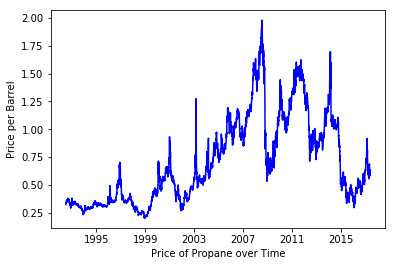

In [211]:
from matplotlib import dates
date_list = []
for day in energy["Day"]:
    date_list.append(dates.datestr2num(day)) # Converting the strings in the Day column to a format that matplotlib can use

propane_prices = energy["Propane Price"]
crude_prices = energy["Crude Oil Price"]
    
plt.plot_date(date_list, propane_prices, color='b', fmt='-') # fmt='-' will tell the function to plot a solid line

# Now let's add some axis labels and a title for the graph
plt.xlabel("Year")
plt.ylabel("Price per Barrel")
plt.xlabel("Price of Propane over Time")
plt.show()

We can also try plotting both propane and crude oil prices on the same graph.

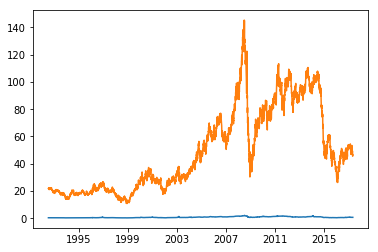

In [212]:
plt.plot_date(date_list, propane_prices, fmt='-')
plt.plot_date(date_list, crude_prices, fmt='-')
plt.show()

Since crude oil is much more expensive than propane, the price information doesn't display well on the same scale. One way to solve this would be to plot with multiple scales. For now, we'll just transform the data so that the prices are on the same scale, from 0 to 1.

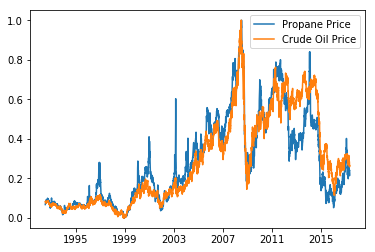

In [210]:
norm_crude = (crude_prices - crude_prices.min()) / (crude_prices.max() - crude_prices.min())
norm_propane = (propane_prices - propane_prices.min()) / (propane_prices.max() - propane_prices.min())

plt.plot_date(date_list, norm_propane, fmt='-')
plt.plot_date(date_list, norm_crude, fmt = '-') 
plt.legend() # Default legend

plt.xlabel("Year")
plt.ylabel("Price per Barrel")
plt.xlabel("Prices of Propane and Crude Oil over Time")

## Diamond quality
Now we'll look at some different data on properties of diamonds.

In [154]:
diamonds = pd.read_csv("~/Downloads/diamonds_bigger.csv")

In [156]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,625
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,400
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,225
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,400
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,225


Let's say we want to look at how carat of a diamond impacts its price. If we try <code>plt.plot(diamonds.carat, diamonds.price)</code>, we will get a weird-looking line graph that basically connects each datapoint with the ones before and after it in the dataset. Instead, we want to use the <code>scatter()</code> function for a scatterplot.

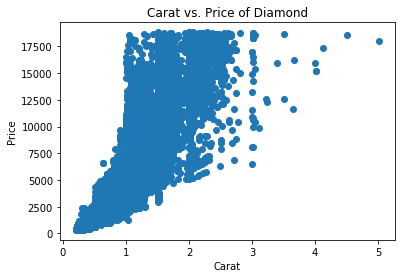

In [213]:
plt.scatter(diamonds.carat, diamonds.price) # diamonds.carat is the same as diamonds["carat"]
# Adding axis labels and titles
plt.ylabel("Price")
plt.xlabel("Carat")
plt.title("Carat vs. Price of Diamond")
plt.show()

This plot tells us that the relationship between carat and price might not be linear. Also, we can see that there are 1 carat and 5 carat diamonds that are worth roughly the same amount. This tells us that there are probably other factors that can help predict price. However, we only have two dimensions to plot on, so we have to get a bit creative with visualizing the effect of additional variables. One way we can do it is through color. Let's try to plot the "color" variable using different colored points on the plot

In [158]:
diamonds.color.unique() # Shows us all the unique values that diamonds.color contains

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

A colormap is a color gradient that can map numbers to points on the gradient. [Here](https://matplotlib.org/examples/color/colormaps_reference.html) is a link to the available colormaps. For example, if we were using the plasma colormap, 0 would map to the purple on the left end of the gradient, 1 would map to the light yellow on the right, and 0.5 would be roughly the magenta at the center.

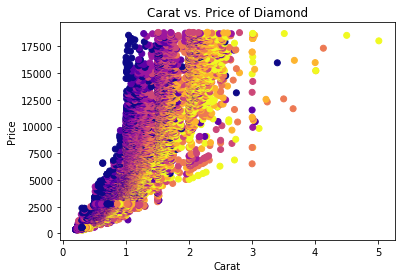

In [214]:
import matplotlib.cm as cm

plot_color = pd.Series([0] * len(diamonds.color)) # Create an empty pandas Series

plot_color[diamonds.color == 'D'] = 1  # Put a 1 in every index that had 'D' in diamonds.color
plot_color[diamonds.color == 'E'] = 2
plot_color[diamonds.color == 'F'] = 3
plot_color[diamonds.color == 'G'] = 4
plot_color[diamonds.color == 'H'] = 5
plot_color[diamonds.color == 'I'] = 6
plot_color[diamonds.color == 'J'] = 7

# We can pass in an array of numbers and a colormap (cm.plasma), and the numbers will automatically be normalized to be between 0 and 1
plt.scatter(diamonds.carat, diamonds.price, c = plot_color, cmap = cm.plasma)
plt.ylabel("Price")
plt.xlabel("Carat")
plt.title("Carat vs. Price of Diamond")

plt.show()

This plot clearly shows that diamond color has an impact on the price.  You can make a legend of the colors by plotting each color individually and then calling <code>plt.legend()</code> like before. I will show a way to manually create it without plotting individually.

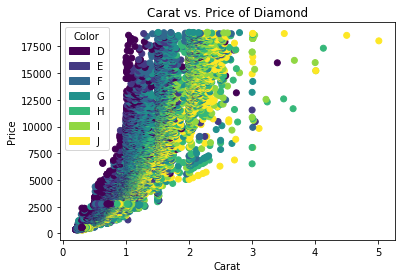

In [217]:
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize

norm = Normalize(1, 7)
color_dict = {'D': cm.viridis(norm(1)), 'E': cm.viridis(norm(2)), 'F': cm.viridis(norm(3)), 'G': cm.viridis(norm(4)), 'H': cm.viridis(norm(5)), 'I': cm.viridis(norm(6)), 'J': cm.viridis(norm(7))}

plt.scatter(diamonds.carat, diamonds.price, c = diamonds.color.apply(lambda x: color_dict[x])) # Specifying color a bit differently
plt.ylabel("Price")
plt.xlabel("Carat")
plt.title("Carat vs. Price of Diamond")

# Making a legend manually
patches = []
color_sorted = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
for color in color_sorted:
    patches.append(mpatches.Patch(color=color_dict[color], label=color))
    
plt.legend(patches, color_sorted, title="Color")

plt.savefig('diamond-plot.png')

plt.show()

Just for reference, D, E, and F diamonds are considered colorless, making them the most desirable. G, H, I, and J diamonds are "near colorless."

We can squeeze another variable into the plot by varying the size of the plotted points. I have created a numerical variable called <code>cut_num</code> based on the "cut" variable to use for plotting. Here are the original values for cut quality: 

In [161]:
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

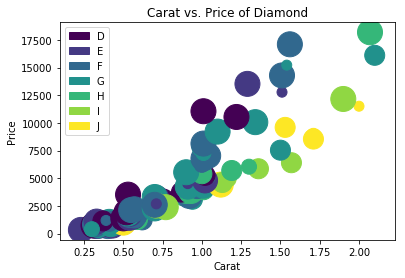

In [220]:
#  Just plot a portion of the points for visibility
diamonds_slice = diamonds.iloc[range(0, len(diamonds), 500), ]

# Plotting points with size based on cut quality
plt.scatter(diamonds_slice.carat, diamonds_slice.price, c = diamonds_slice.color.apply(lambda x: color_dict[x]), 
            s=diamonds_slice.cut_num) 

plt.ylabel("Price")
plt.xlabel("Carat")
plt.title("Carat vs. Price of Diamond")

# Making a legend the same way as before
patches = []
color_sorted = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
for color in color_sorted:
    patches.append(mpatches.Patch(color=color_dict[color], label=color))
    
plt.legend(patches, color_sorted)

plt.show()